# Data Preprocessing

In [42]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display a few rows of each data frame
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [43]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [44]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [45]:
# Convert 'SignupDate' and 'TransactionDate' to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Feature Engineering

In [57]:
# Aggregate transactions to get customer-level metrics
customer_transactions = transactions.groupby('CustomerID').agg(
    TransactionCount=('TransactionID', 'count'),
    TotalSpent=('TotalValue', 'sum'),
    AverageTransactionValue=('TotalValue', 'mean'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

In [58]:
# Merge datasets to create a feature set for clustering
customer_data = pd.merge(customers, customer_transactions, on='CustomerID')

In [59]:
# Convert categorical data to numerical
customer_data = pd.get_dummies(customer_data, columns=['Region'])
customer_data.head()

,CustomerID,CustomerName,SignupDate,TransactionCount,TotalSpent,AverageTransactionValue,TotalQuantity,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,Lawrence Carroll,2022-07-10,5,3354.52,670.904,12,False,False,False,True
1,C0002,Elizabeth Lutz,2022-02-13,4,1862.74,465.685,10,True,False,False,False
2,C0003,Michael Rivera,2024-03-07,4,2725.38,681.345,14,False,False,False,True
3,C0004,Kathleen Rodriguez,2022-10-09,8,5354.88,669.360,23,False,False,False,True
4,C0005,Laura Weber,2022-08-15,3,2034.24,678.080,7,True,False,False,False


# Apply Clustering
Use the Elbow method and apply K-Means clustering.

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [74]:
# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(customer_data.drop(columns=['CustomerID', 'CustomerName']))
features_to_scale = ['TotalSpent', 'TransactionCount', 'AverageTransactionValue']
customer_data[features_to_scale] = scaler.fit_transform(customer_data[features_to_scale])

In [79]:
# Convert 'SignupDate' to a numerical feature, e.g., days since signup
customer_data['DaysSinceSignup'] = (pd.to_datetime('today') - customers['SignupDate']).dt.days

# Drop the original 'SignupDate' column
customer_data.drop(columns=['SignupDate'], inplace=True)

print(customer_data.dtypes)

CustomerID                  object
CustomerName                object
TransactionCount           float64
TotalSpent                 float64
AverageTransactionValue    float64
TotalQuantity                int64
Region_Asia                   bool
Region_Europe                 bool
Region_North America          bool
Region_South America          bool
DaysSinceSignup              int64
dtype: object


In [80]:
customer_data.head()

,CustomerID,CustomerName,TransactionCount,TotalSpent,AverageTransactionValue,TotalQuantity,Region_Asia,Region_Europe,Region_North America,Region_South America,DaysSinceSignup
0,C0001,Lawrence Carroll,0.4,0.308942,0.474336,12,False,False,False,True,933
1,C0002,Elizabeth Lutz,0.3,0.168095,0.308940,10,True,False,False,False,1080
2,C0003,Michael Rivera,0.3,0.249541,0.482751,14,False,False,False,True,327
3,C0004,Kathleen Rodriguez,0.7,0.497806,0.473092,23,False,False,False,True,842
4,C0005,Laura Weber,0.2,0.184287,0.480120,7,True,False,False,False,897


In [81]:
scaled_data = customer_data.drop(columns=['CustomerID','CustomerName'], axis=1)

In [82]:
scaled_data

,TransactionCount,TotalSpent,AverageTransactionValue,TotalQuantity,Region_Asia,Region_Europe,Region_North America,Region_South America,DaysSinceSignup
0,0.4,0.308942,0.474336,12,False,False,False,True,933
1,0.3,0.168095,0.308940,10,True,False,False,False,1080
2,0.3,0.249541,0.482751,14,False,False,False,True,327
3,0.7,0.497806,0.473092,23,False,False,False,True,842
4,0.2,0.184287,0.480120,7,True,False,False,False,897
...,...,...,...,...,...,...,...,...,...
194,0.3,0.462684,0.937609,12,False,True,False,False,133
195,0.2,0.174318,0.451753,9,False,True,False,False,966
196,0.1,0.080203,0.309126,3,False,True,False,False,679
197,0.3,0.179098,0.332422,9,False,True,False,False,1066


## Elbow Method

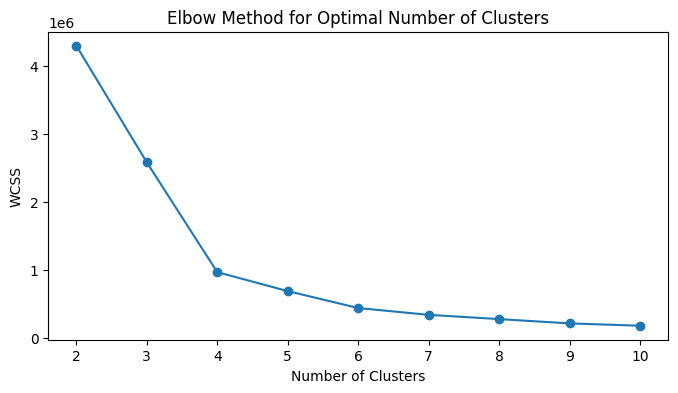

In [96]:
# Using the Elbow method to find the optimal number of clusters
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.savefig('Elbow Method for Optimal Number of Clusters.png', dpi=300, bbox_inches='tight')
plt.show()

## Evaluate Clustering Metrics
Evaluate the clustering using the Davies-Bouldin Index and Silhouette Score.

In [90]:
# Choose an optimal number of clusters from the Elbow method
optimal_k = 4 

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.labels_

# Add the cluster label to the data
customer_data['Cluster'] = clusters

# Calculate evaluation metrics
db_index = davies_bouldin_score(scaled_data, clusters)
silhouette_avg = silhouette_score(scaled_data, clusters)

print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 0.4553932001330353
Silhouette Score: 0.622603236902826


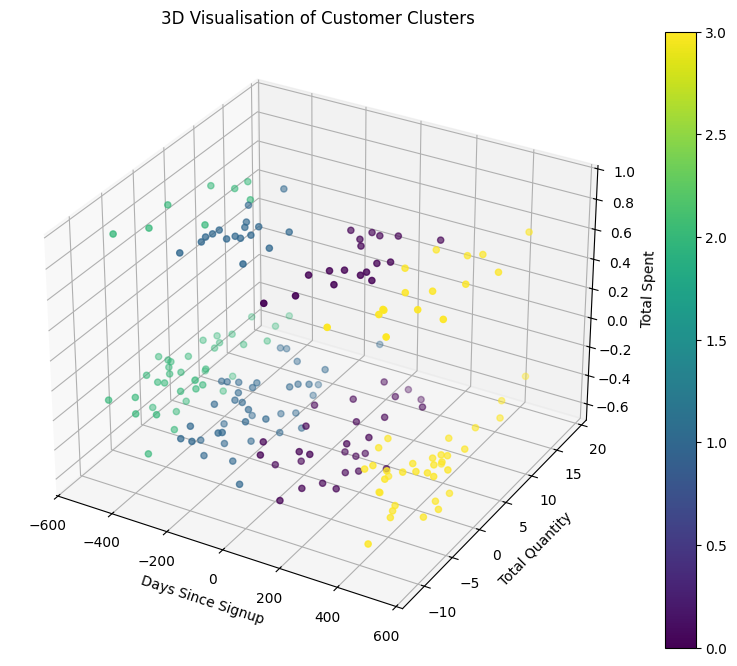

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce the data to 3 dimensions using PCA
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], 
                     c=clusters, cmap='viridis', marker='o')

# Set labels
ax.set_xlabel('Days Since Signup')
ax.set_ylabel('Total Quantity')
ax.set_zlabel('Total Spent')
ax.set_title('3D Visualisation of Customer Clusters')

# Add a color bar
plt.colorbar(scatter)
plt.savefig('3D Visualisation of Customer Clusters.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()